In [1]:
import json
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import operator


In [2]:
events = {}
nations = ['Italy','England','Germany','France','Spain','European_Championship','World_Cup']
for nation in nations:
    with open('../Data/events/events_%s.json' %nation) as json_data:
        events[nation] = json.load(json_data)


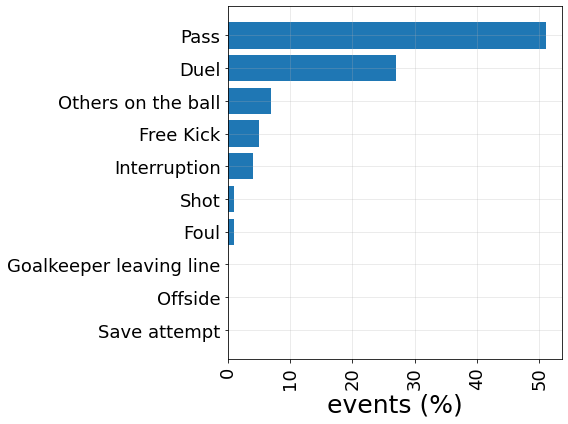

In [3]:
eventsByNation = []
for nation in nations:
    for i in range(len(events[nation])):
        eventsByNation.append(events[nation][i]['eventName'])

count = Counter(eventsByNation)
counter = {}
for i,v in zip(count.keys(),count.values()):
    counter[i] = int(float(v)/len(eventsByNation)*100)
sorted_d = np.array(sorted(counter.items(), key=operator.itemgetter(1), reverse=False))

#bar plot
f,ax = plt.subplots(figsize=(8,6))
plt.barh(list(sorted_d[:,0]),[int(x) for x in list(sorted_d[:,1])])
plt.xticks(rotation=90)
plt.xticks(fontsize=18)
plt.xlabel('events (%)', fontsize=25)
plt.yticks(fontsize=18)
plt.grid(alpha=0.3)
f.tight_layout()
plt.show()
